In [2]:
from scipy.stats import norm
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.weightstats as ws
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import binomtest
from scipy.stats import wilcoxon

#### Table of Contents

[1. Large sample sizes with data normally distributed: **$z$-test**](#1-large-sample-sizes-with-data-normally-distributed-$z$-test)

[2. Hypothesis testing for normally distributed data: **$t$-test**](#2-hypothesis-testing-for-normally-distributed-data-$t$-test)

[3. Hypothesis testing for data that does not follow a normal distribution: **Mann-Whitney U** and **Wilcoxon test**](#3-hypothesis-testing-for-data-that-does-not-follow-a-normal-distribution-mann-whitney-u-and-wilcoxon-test)

### 1. Large sample sizes with data normally distributed: **$z$-test**

Loading the correct dataset:

In [3]:
data = pd.read_csv('data/high-school.csv')

In [4]:
data.head()

,Nr,CLASS,GENDER,AGE,HEIGHT,SPORTS,TV,COMPUTER,SUBJECT,ALLOWANCE,WORK,PROVINCE,BREAKFAST
0,0,1,Girl,12,160,1,4,6,Mathematics,5,0,23,Yes
1,1,1,Girl,11,162,3,4,4,Computer Science,3,0,23,Yes
2,2,1,Girl,12,168,1,20,5,Other,25,0,23,Yes
3,3,1,Boy,13,149,0,6,2,Mathematics,10,0,23,Brought something
4,4,1,Girl,12,170,3,30,1,Engineering,5,0,23,Yes


In [5]:
data.shape

(50069, 13)

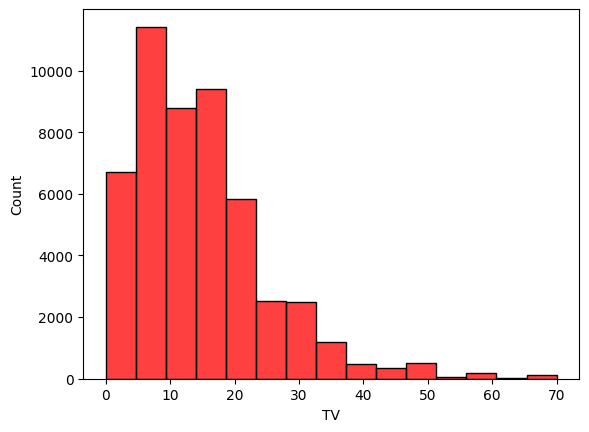

In [6]:
sn.histplot(data=data, x='TV', bins=15, color='r')
plt.show()

**Hypotheses**:

- Children spend in average less than 14 hours ($\mu_0$) in front of TV ($H_0$)
- Children spend much more than that ($H_a$)

$$H_0: \mu \leq \mu_0 = 14$$
$$H_a: \mu > 14$$

With 95% C.L. ($\alpha = 0.05$)

In [27]:
mu0 = 14
ybar = np.mean(data.TV)
s = np.std(data.TV)
m,n = data.shape
tn = (ybar - mu0)/(s/np.sqrt(m))

In [28]:
print(ybar, s, tn)

14.229143781581417 10.43568654970455 4.913279934644519


In [29]:
# alpha = 0.05 (significance)
CL = 0.95 # or 1 - alpha
alpha = 0.05
z_critic = norm.ppf(1 - alpha, loc=0, scale=1)
z_critic

1.6448536269514722

In [30]:
print(z_critic, tn)
tn > z_critic

1.6448536269514722 4.913279934644519


True

Since the $z$ from the test is substantially larger tha $z$-critic, the null hypothesis $H_0$ is rejected, which means that we can infer that children spend more than 14 hours per week with 95% C.L.

The above calculations can be done using `statsmodels` library:

In [31]:
z_test, p_value = ws.ztest(data.TV, value=mu0, alternative='larger')
print(z_test, p_value)

4.913230869310007 4.4793839738613927e-07


For the **two sided** case the hypotheses should be reformulated:

**Hypotheses**:

- Children spend in average 14 hours ($\mu_0$) in front of TV ($H_0$)
- Children do not spend 14 hours ($H_a$)

$$H_0: \mu = 14$$
$$H_a: \mu \neq 14$$

With 95% C.L. ($\alpha = 0.05$)

In [34]:
# two-sided test
z_test, p_value = ws.ztest(data.TV, value=mu0, alternative='two-sided')

# alpha = 0.05 (significance)
alpha = 0.05
z_critic_high = norm.ppf(1 - alpha/2, loc=0, scale=1)
z_critic_low = -z_critic_high

print(z_critic_low, z_critic_high, z_test, p_value)
print(z_test < z_critic_low or z_test > z_critic_high)

-1.959963984540054 1.959963984540054 4.913230869310007 8.958767947722785e-07
True


Since the $z$ value from the test does not lie into the two $z$-critic, the null hypothesis $H_0$ is rejected.

It is important to emphasize that for the results above the sample size should be asymptotically large to results be precise. **In any case, $z$-test should bbe avoided, and the $t$-test described as follows should be used, since it works well for any sample size**.

### 2. Hypothesis testing for normally distributed data: **$t$-test**

**Independent samples:**

Firstly, we generate two independent samples:

In [65]:
np.random.seed(21349)

x = np.random.normal(loc=5, scale=1, size=20)
y = np.random.normal(loc=3, scale=3, size=20)

Now we use a t-test to check if the $x$ sample is equal to zero (null hypothesis), which is valid for any sample size:

In [66]:
ttest = ttest_1samp(x, 0)
t_value, p_value, df = ttest.statistic, ttest.pvalue, ttest.df

print('t-value:', t_value, ' p-value:', p_value, 'df:', df)

t-value: 20.78956805811129  p-value: 1.573567278371082e-14 df: 19


We rejected the null hypothesis.

In this second situation we consider the case of two samples, and the null hypothesis is wether the mean of $x$ is equal to the mean of $y$, or $\mu_x = \mu_y$:

In [67]:
ttest = ttest_ind(x, y, equal_var=False)

print('Mean of x: %.1f, Mean of y: %.1f'%(np.mean(x), np.mean(y)))

t_value, p_value, df = ttest.statistic, ttest.pvalue, ttest.df

print('t-value:', t_value, ' p-value:', p_value, 'df:', df)
print('Actual df: n1 + n2 - 2 =', len(x) + len(y) - 2)

Mean of x: 4.7, Mean of y: 3.1
t-value: 2.3206560204298796  p-value: 0.02925081002538167 df: 23.67631591930545
Actual df: n1 + n2 - 2 = 38


The null hypothesis is also rejected with 95% C.L.

**Paired samples:**

The above cases provided t-tests of independent samples. In the case of paired samples we need the paired t-test:

In [68]:
np.random.seed(21349)

z = np.random.normal(loc=3, scale=5, size=20)
e1 = np.random.normal(loc=0, scale=1, size=20)
e2 = np.random.normal(loc=0, scale=1, size=20)

x1 = z + e1
x2 = z + e2 + 1

ttest = ttest_rel(x1, x2, alternative='two-sided')

t_value, p_value, df = ttest.statistic, ttest.pvalue, ttest.df

print('t-value:', t_value, ' p-value:', p_value, 'df:', df)

t-value: -4.0877419625954525  p-value: 0.0006270545631179227 df: 19


We rejected the null hypothesis of paired samples having equal mean.

### 3. Hypothesis testing for data that does not follow a normal distribution: **Mann-Whitney U** and **Wilcoxon test**

**Independent samples:** Mann-Whitney U test

Let us use the same generated data to compare the means of both samples: the null hypothesis is that they have the same means

In [76]:
mann_whitney = mannwhitneyu(x, y, alternative='two-sided')

U_value, p_value = mann_whitney.statistic, mann_whitney.pvalue

print('t-value:', U_value, ' p-value:', p_value)

t-value: 281.0  p-value: 0.02944088441208284


The null hypothesis is rejected.

**Paired samples:**

1. **Sign test**

Now we compare the samples of paired tests to check if the population mean of a sample $x_1$ could be greater than the corresponding one of the sample $x_2$:

In [3]:
np.random.seed(21349)

z = np.random.normal(loc=3, scale=5, size=20)
e1 = np.random.normal(loc=0, scale=1, size=20)
e2 = np.random.normal(loc=0, scale=1, size=20)

x1 = z + e1
x2 = z + e2 + 1

z = np.where(x1 - x2 > 0, 1, 0)
count = np.sum(z)

binom_test = binomtest(count, 20)
p_value, statistic = binom_test.pvalue, binom_test.statistic

print('Statistic:', statistic, ' p-value:', p_value, 'Counts:', count)

Statistic: 0.15  p-value: 0.0025768280029296875 Counts: 3


The null hypothesis is rejected. Note that this test have disadvantages in comparison to the following automated test. 

2. **Wilcoxon test**

We test again the same hypotheses, but now with Wilcoxon test:

In [7]:
np.random.seed(21349)

z = np.random.normal(loc=3, scale=5, size=20)
e1 = np.random.normal(loc=0, scale=1, size=20)
e2 = np.random.normal(loc=0, scale=1, size=20)

x1 = z + e1
x2 = z + e2 + 1

statistic, p_value = wilcoxon(x1, x2)

print('Statistic:', statistic, ' p-value:', p_value, 'Counts:', count)

Statistic: 23.0  p-value: 0.001209259033203125 Counts: 3


The null hypothesis is rejected.